In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
from scipy.optimize import curve_fit

%matplotlib inline

Defining the Variables

In [510]:
# Parametersfor the benchmarking
fps=100
num_particles=1000
dt=1.0/fps
spatial_resolution=1E-6  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution

0.00021903148058823087


Generating initial x coordinates

In [511]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_rough= sample_x_in_resol.astype('int64')
# print(sample_x_trunc[:10])
sample_x_rough_prev_SI=sample_x_rough.astype('float64')*spatial_resolution

print(sample_x_rough_prev_SI)
# print(sample_x_SI)

[9.260e-04 1.347e-03 1.521e-03 1.185e-03 1.427e-03 1.318e-03 1.562e-03
 1.627e-03 3.680e-04 4.520e-04 1.210e-03 3.950e-04 4.390e-04 2.850e-04
 1.118e-03 4.500e-04 9.890e-04 1.541e-03 1.558e-03 3.000e-04 1.276e-03
 1.487e-03 2.320e-04 1.691e-03 2.910e-04 7.200e-05 4.780e-04 1.278e-03
 4.260e-04 3.920e-04 3.100e-05 9.840e-04 1.449e-03 1.290e-03 1.201e-03
 1.066e-03 1.260e-04 5.190e-04 9.450e-04 1.688e-03 1.584e-03 1.099e-03
 1.513e-03 1.282e-03 1.037e-03 1.399e-03 1.326e-03 1.591e-03 1.151e-03
 8.500e-04 5.830e-04 5.750e-04 1.199e-03 9.810e-04 4.060e-04 1.747e-03
 1.150e-04 9.610e-04 9.640e-04 4.560e-04 5.840e-04 7.660e-04 1.739e-03
 1.195e-03 1.670e-03 3.710e-04 6.950e-04 1.338e-03 3.100e-04 1.528e-03
 1.638e-03 3.700e-04 7.750e-04 1.307e-03 2.390e-04 8.260e-04 2.990e-04
 4.920e-04 6.070e-04 1.595e-03 1.248e-03 8.300e-05 3.810e-04 8.970e-04
 1.699e-03 8.030e-04 2.760e-04 4.800e-04 1.243e-03 1.002e-03 1.950e-04
 6.370e-04 2.280e-04 1.741e-03 1.400e-04 1.533e-03 1.340e-03 1.179e-03
 1.582

In [512]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

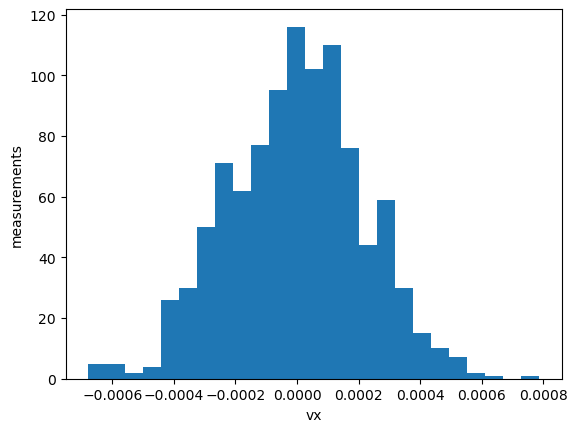

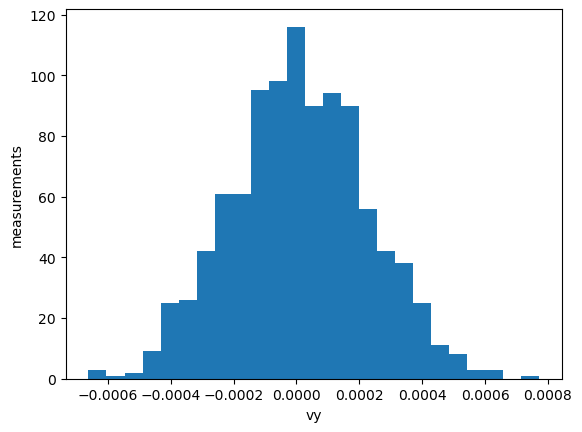

In [513]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, 25) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, 25) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

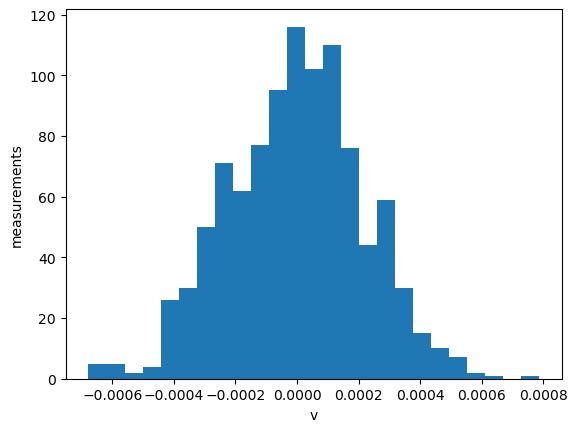

In [514]:
# Simulating the motion of the particles
x_forward=sample_x + sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
# print(x_forward_in_resol[:10])
x_forward_trunc=x_forward_in_resol.astype('int64')   
#print(x_forward_trunc)
# print(x_forward_trunc[:10])
x_forward_rough_SI=x_forward_trunc.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, 25) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

[-1.e-04  4.e-04  3.e-04  0.e+00 -2.e-04 -4.e-04  2.e-04  1.e-04 -1.e-04
 -1.e-04]
[-6.54604294e-05  4.20881500e-04  2.87731534e-04 -1.58666360e-05
 -1.41026772e-04 -4.04766569e-04  2.00228178e-04  1.66663990e-04
 -1.20525844e-04 -1.64266918e-04]
3.280546399008723e-05
0.7144303191953696
71.44303191953696


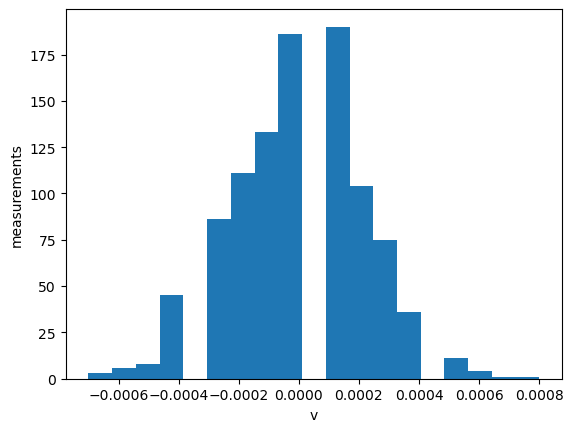

In [515]:
# Calculating restored velocities
v_restored=(x_forward_rough_SI - sample_x_rough_prev_SI)/dt
print(v_restored[:10])
print(sample_vx[:10])   
fig, ax = plt.subplots()
ax.hist(v_restored, 19) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

Code to simulate motion in y

In [516]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the y coordinates of the particles
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
sample_y_rough= sample_y_in_resol.astype('int64')
sample_y_rough_prev_SI=sample_y_rough.astype('float64')*spatial_resolution

Text(0, 0.5, 'measurements')

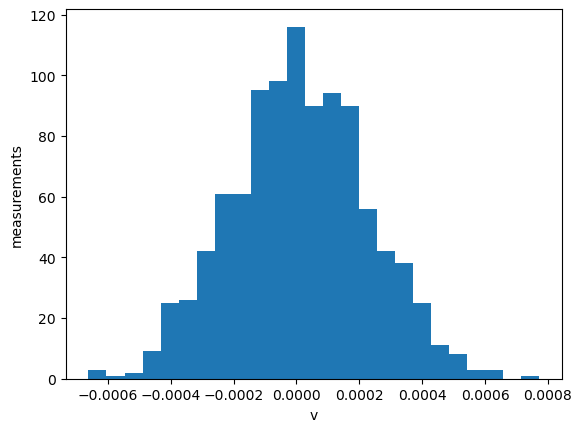

In [517]:
# Simulating the motion of the particles
y_forward=sample_y_rough_prev_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_rough=y_forward_in_resol.astype('int64')
# print(x_forward_trunc)
y_forward_rough_SI=y_forward_rough.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, 25) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates for two frames

In [518]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
    init_frame=1
    final_frame=200 #using it as 2 now will parametrise it when making a general function
    dt=1.0/fps
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
    unif_x = sts.uniform(left_SI, right_SI-left_SI)
    sample_x=unif_x.rvs(num_particles)
    sample_x_in_resol= sample_x/spatial_resolution
    sample_x_trunc= sample_x_in_resol.astype(int)
    sample_x_trunc_SI=sample_x_trunc*spatial_resolution
    
    unif_y = sts.uniform(down_SI, up_SI-down_SI)
    sample_y=unif_y.rvs(num_particles)
    sample_y_in_resol= sample_y/spatial_resolution
    sample_y_trunc= sample_y_in_resol.astype(int)
    sample_y_trunc_SI=sample_y_trunc*spatial_resolution
    # Generate a sample of 1000 random velocities from a normal distribution
    norm_rv = sts.norm(mu, sigma)
    sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
    sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
    
    frame_data = [] # to store the data for each frame
    while init_frame <= final_frame:
        
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype(int)
        x_forward_SI = x_forward_trunc.astype(float) * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype(int)
        y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        for j in range(num_particles):
            # Append the data for the current frame
            frame_data.append([sample_x_trunc_SI[j], sample_y_trunc_SI[j], j,init_frame,v_restored_x[j],v_restored_y[j], sample_vx[j], sample_vy[j]])
        # Update the initial positions for the next frame
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI=y_forward_SI
        init_frame+=1
    # Create a DataFrame
    x_y_df = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no','frame','vx (restored)','vy (restored)', 'vx', 'vy'])
    return x_y_df

In [519]:
# Print the DataFrame for each frame
x_y_df = make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)
print(x_y_df[x_y_df['frame']==1])

            x         y  part_no  frame  vx (restored)  vy (restored)  \
0    0.001733  0.001302        0      1         0.0000        -0.0001   
1    0.001287  0.000947        1      1         0.0001         0.0003   
2    0.001120  0.000423        2      1         0.0000        -0.0006   
3    0.000931  0.000638        3      1         0.0000        -0.0002   
4    0.001584  0.001140        4      1        -0.0003         0.0001   
..        ...       ...      ...    ...            ...            ...   
995  0.000166  0.001155      995      1         0.0003        -0.0005   
996  0.001442  0.000130      996      1         0.0001        -0.0001   
997  0.001218  0.000015      997      1         0.0000        -0.0002   
998  0.000147  0.001573      998      1         0.0002         0.0001   
999  0.000046  0.000736      999      1        -0.0002        -0.0001   

           vx        vy  
0    0.000053 -0.000089  
1    0.000110  0.000376  
2    0.000072 -0.000549  
3    0.000069 -0.00

<BarContainer object of 19 artists>

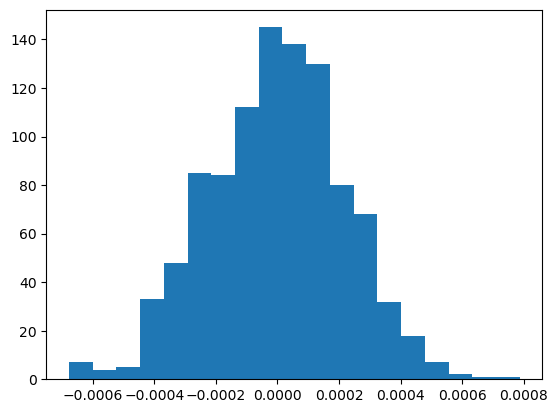

In [520]:
counts_act, bins_act = np.histogram(sample_vx, bins = 19)
fig_act, ax_act = plt.subplots()
arr_bins_centers = 0.5 * (bins_act[1:] + bins_act[:-1])
ax_act.bar(arr_bins_centers, counts_act, width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 18 artists>

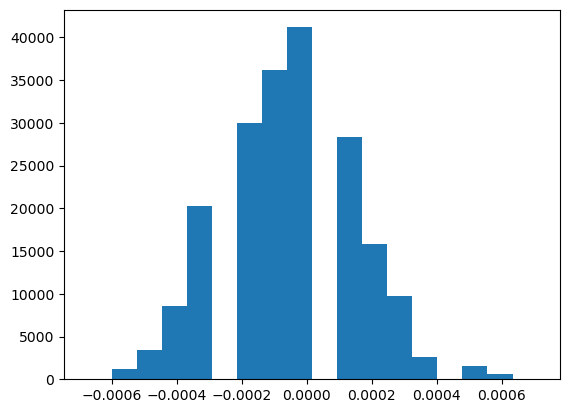

In [521]:
fig, ax = plt.subplots()
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_res_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_res_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

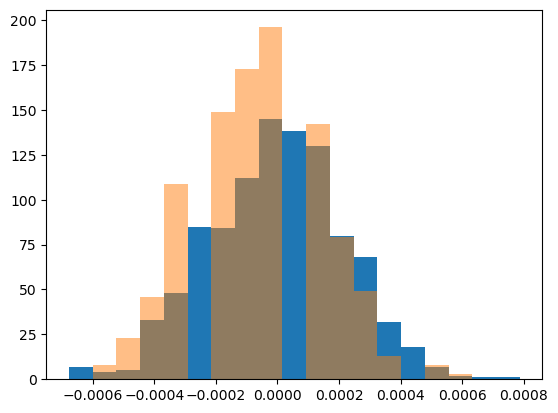

In [522]:
counts, bins = np.histogram(sample_vx, bins = 19)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df[x_y_df['frame'] == 1]['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [523]:
print(np.std(vx_restored))
print(np.std(sample_vx))
print(mass*np.std(sample_vx)**2/constants.Boltzmann)
print(mass*np.std(vx_restored)**2/constants.Boltzmann)

0.00021212251177091056
0.00021900684902179343
999.7750991649381
937.9084406534853


Function to get the discrepancies

In [524]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [525]:
get_percent_discrepancies(vx_restored,sample_vx)

519.7946492525366

<BarContainer object of 19 artists>

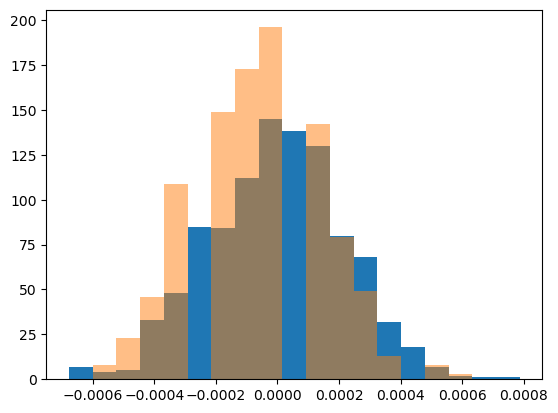

In [526]:
df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)
counts, bins = np.histogram(sample_vx, bins = 19)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df[x_y_df['frame'] == 1]['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

Text(0, 0.5, 'measurements')

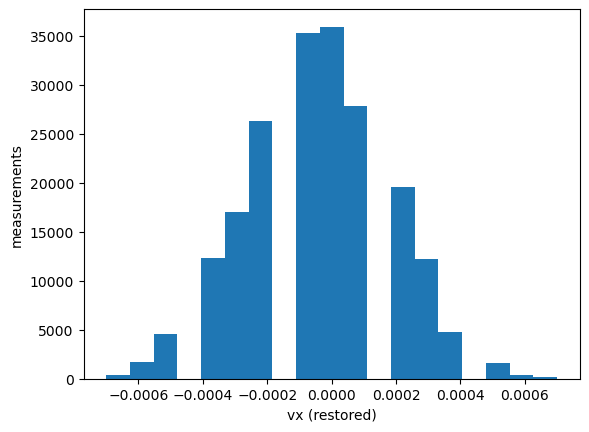

In [527]:
fig, ax = plt.subplots()
ax.hist(df['vx (restored)'],19) # plot histogram
ax.set_xlabel('vx (restored)')
ax.set_ylabel('measurements')

In [528]:
print(np.std(df['vx (restored)']))
print(np.std(df['vx']))
print(mass*np.std(df['vx (restored)'])**2/constants.Boltzmann)
print(mass*np.std(df['vx'])**2/constants.Boltzmann)
print(get_percent_discrepancies(df['vx (restored)'],df['vx']))


0.00022381427349431855
0.00022900535578622536
1044.1490114639726
1093.1460781325204
106.99240014738001


In [529]:
spatial_resolution_arr=np.arange(1E-9,1E-6,1E-8)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))

[1.00e-09 1.10e-08 2.10e-08 3.10e-08 4.10e-08 5.10e-08 6.10e-08 7.10e-08
 8.10e-08 9.10e-08 1.01e-07 1.11e-07 1.21e-07 1.31e-07 1.41e-07 1.51e-07
 1.61e-07 1.71e-07 1.81e-07 1.91e-07 2.01e-07 2.11e-07 2.21e-07 2.31e-07
 2.41e-07 2.51e-07 2.61e-07 2.71e-07 2.81e-07 2.91e-07 3.01e-07 3.11e-07
 3.21e-07 3.31e-07 3.41e-07 3.51e-07 3.61e-07 3.71e-07 3.81e-07 3.91e-07
 4.01e-07 4.11e-07 4.21e-07 4.31e-07 4.41e-07 4.51e-07 4.61e-07 4.71e-07
 4.81e-07 4.91e-07 5.01e-07 5.11e-07 5.21e-07 5.31e-07 5.41e-07 5.51e-07
 5.61e-07 5.71e-07 5.81e-07 5.91e-07 6.01e-07 6.11e-07 6.21e-07 6.31e-07
 6.41e-07 6.51e-07 6.61e-07 6.71e-07 6.81e-07 6.91e-07 7.01e-07 7.11e-07
 7.21e-07 7.31e-07 7.41e-07 7.51e-07 7.61e-07 7.71e-07 7.81e-07 7.91e-07
 8.01e-07 8.11e-07 8.21e-07 8.31e-07 8.41e-07 8.51e-07 8.61e-07 8.71e-07
 8.81e-07 8.91e-07 9.01e-07 9.11e-07 9.21e-07 9.31e-07 9.41e-07 9.51e-07
 9.61e-07 9.71e-07 9.81e-07 9.91e-07]
100


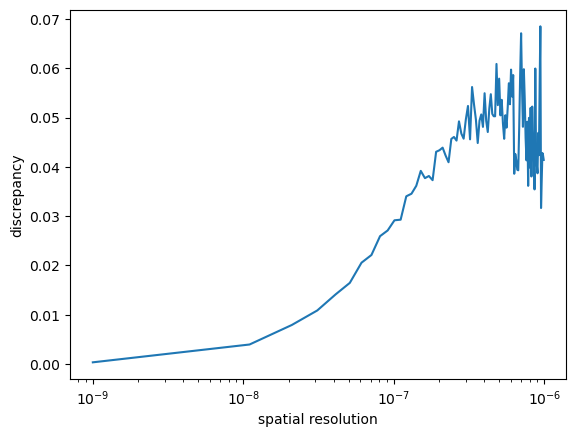

In [530]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(spatial_resolution_arr)):
    spatial_resolution=spatial_resolution_arr[i]
    df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)
    discrepancy=get_percent_discrepancies(df['vx (restored)'],df['vx'])
    discrepancy_arr.append(discrepancy)
    T=mass*np.std(df['vx'])**2/constants.Boltzmann
    T_restored=mass*np.std(df['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)




fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('discrepancy')
ax.set_xscale('log')
